The dataset shall be cleaned with the following assumptions:
1. Checking for missing Metric values(by considering the students whom have none as dropped)
2. Students that have none of the above metrics stated is presumed to have dropped out
   of the module and should not count towards the final enrolment number for that module.
3. Students that scored below 50% in a module and are not shown to be enrolled in one of
   the next modules are presumed to have failed and should be excluded when calculating
   module-to-module retention.
4. Students that pass Angular can enrol in either Java or Python but not both.
5. Students that pass Java can proceed to take Android but not Django.
6. Students that pass Python can proceed to take Django but not Android.
7. Students that pass either Android or Django can proceed to take Professional
   Development.

In [149]:
!pip install pandas
!pip install seaborn
!pip install openpyxl

In [22]:

# importing necessary libriaries
# https://docs.google.com/spreadsheets/d/1BKXKNhhtgh8mHrERFE9qcPamLsRqCIPwQKIKsiXGqKg/edit?gid=0#gid=0
import pandas as pd
import seaborn as sn
import openpyxl

# Reading the data provided
sheet_id = '1BKXKNhhtgh8mHrERFE9qcPamLsRqCIPwQKIKsiXGqKg'

xls = pd.ExcelFile(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?formart=xlsx")
                    
Angular = pd.read_excel(xls, 'Angular', header=0)

Angular

,hed__Contact__c,mor_Attendance_Score__c,IP_Grade_Average__c,mor_Total_Activity_Time__c,Participations_Level__c,Page_Views_Level__c,hed__Course_Offering__c,Prerequisite_Course_Connection__c
0,0034K00000AAqD5QAL,NaN,NaN,32980.0,NaN,NaN,a0R4K000001z16cUAA,a0P4K000001LuzQUAS
1,0034K00000BAy34QAD,100.0,88.635,518086.0,1.0,3.0,a0R4K000001z16cUAA,a0P4K000001LuzRUAS
2,0034K00000B8gO1QAJ,100.0,71.590,219604.0,3.0,3.0,a0R4K000001z16cUAA,a0P4K000001LuzTUAS
3,0034K00000B8gOhQAJ,100.0,64.770,38278.0,2.0,2.0,a0R4K000001z16cUAA,a0P4K000001LuzUUAS
4,0034K00000B8gOQQAZ,100.0,81.820,310581.0,3.0,2.0,a0R4K000001z16cUAA,a0P4K000001LuzVUAS
...,...,...,...,...,...,...,...,...
96,0034K00000BBF45QAH,NaN,0.000,856.0,NaN,NaN,a0R4K000001z16cUAA,a0P4K000001Lv05UAC
97,0034K00000BBPB6QAP,NaN,0.000,0.0,NaN,NaN,a0R4K000001z16cUAA,a0P4K000001LuzWUAS
98,0034K00000I6xHbQAJ,NaN,0.000,0.0,NaN,NaN,a0R4K000001z16cUAA,NaN
99,0034K00000AAqKAQA1,NaN,0.000,12416.0,0.0,1.0,a0R4K000001z16cUAA,NaN


In [23]:
Angular

,hed__Contact__c,mor_Attendance_Score__c,IP_Grade_Average__c,mor_Total_Activity_Time__c,Participations_Level__c,Page_Views_Level__c,hed__Course_Offering__c,Prerequisite_Course_Connection__c
0,0034K00000AAqD5QAL,NaN,NaN,32980.0,NaN,NaN,a0R4K000001z16cUAA,a0P4K000001LuzQUAS
1,0034K00000BAy34QAD,100.0,88.635,518086.0,1.0,3.0,a0R4K000001z16cUAA,a0P4K000001LuzRUAS
2,0034K00000B8gO1QAJ,100.0,71.590,219604.0,3.0,3.0,a0R4K000001z16cUAA,a0P4K000001LuzTUAS
3,0034K00000B8gOhQAJ,100.0,64.770,38278.0,2.0,2.0,a0R4K000001z16cUAA,a0P4K000001LuzUUAS
4,0034K00000B8gOQQAZ,100.0,81.820,310581.0,3.0,2.0,a0R4K000001z16cUAA,a0P4K000001LuzVUAS
...,...,...,...,...,...,...,...,...
96,0034K00000BBF45QAH,NaN,0.000,856.0,NaN,NaN,a0R4K000001z16cUAA,a0P4K000001Lv05UAC
97,0034K00000BBPB6QAP,NaN,0.000,0.0,NaN,NaN,a0R4K000001z16cUAA,a0P4K000001LuzWUAS
98,0034K00000I6xHbQAJ,NaN,0.000,0.0,NaN,NaN,a0R4K000001z16cUAA,NaN
99,0034K00000AAqKAQA1,NaN,0.000,12416.0,0.0,1.0,a0R4K000001z16cUAA,NaN


Checking which colums are having the NaN values
Introducing the .any() to list all columns where the boolean is false = No NaN and true has NaN values.

In [68]:
Angular.isna().any()

hed__Contact__c               False
mor_Attendance_Score__c        True
IP_Grade_Average__c            True
mor_Total_Activity_Time__c     True
Participations_Level__c        True
Page_Views_Level__c            True
dtype: bool

# Cleaning the NaN values 
### 1. Drop

In [26]:
new_df = Angular.dropna()

In [27]:
new_df

,hed__Contact__c,mor_Attendance_Score__c,IP_Grade_Average__c,mor_Total_Activity_Time__c,Participations_Level__c,Page_Views_Level__c,hed__Course_Offering__c,Prerequisite_Course_Connection__c
1,0034K00000BAy34QAD,100.0,88.635,518086.0,1.0,3.0,a0R4K000001z16cUAA,a0P4K000001LuzRUAS
2,0034K00000B8gO1QAJ,100.0,71.590,219604.0,3.0,3.0,a0R4K000001z16cUAA,a0P4K000001LuzTUAS
3,0034K00000B8gOhQAJ,100.0,64.770,38278.0,2.0,2.0,a0R4K000001z16cUAA,a0P4K000001LuzUUAS
4,0034K00000B8gOQQAZ,100.0,81.820,310581.0,3.0,2.0,a0R4K000001z16cUAA,a0P4K000001LuzVUAS
5,0034K00000BAy3UQAT,100.0,96.590,903576.0,2.0,3.0,a0R4K000001z16cUAA,a0P4K00000122vzUAA
...,...,...,...,...,...,...,...,...
72,0034K00000B8gOiQAJ,100.0,72.725,275548.0,2.0,2.0,a0R4K000001z16cUAA,a0P4K000001Lv1IUAS
73,0034K00000B8gOVQAZ,100.0,52.275,50436.0,2.0,1.0,a0R4K000001z16cUAA,a0P4K000001Lv1KUAS
74,0034K00000B8gNxQAJ,100.0,61.365,154821.0,3.0,2.0,a0R4K000001z16cUAA,a0P4K000001Lv1LUAS
75,0034K00000B8gNoQAJ,100.0,67.045,78511.0,2.0,1.0,a0R4K000001z16cUAA,a0P4K000001Lv1PUAS


In [55]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, 1 to 76
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   hed__Contact__c                    66 non-null     object 
 1   mor_Attendance_Score__c            66 non-null     float64
 2   IP_Grade_Average__c                66 non-null     float64
 3   mor_Total_Activity_Time__c         66 non-null     float64
 4   Participations_Level__c            66 non-null     float64
 5   Page_Views_Level__c                66 non-null     float64
 6   hed__Course_Offering__c            66 non-null     object 
 7   Prerequisite_Course_Connection__c  66 non-null     object 
dtypes: float64(5), object(3)
memory usage: 4.6+ KB


In [69]:
angularData = new_df.rename(columns={
    'hed__Contact__c': 'Student ID',
    'mor_Attendance_Score__c': 'Attendance Score',
    'IP_Grade_Average__c' : 'Avg IP Grade',
    'mor_Total_Activity_Time__c' : 'Activity Time',
    'Participations_Level__c': 'Participations Level',
    'Page_Views_Level__c': 'Page View Level',
    'hed__Course_Offering__c': 'Module',
    'Prerequisite_Course_Connection__c': 'Next Module'
})

Removing Unwanted Colunms thats the "hed__Course_Offering__c" and "Prerequisite_Course_Connection__c"

In [72]:
angularData 

,Student ID,Attendance Score,Avg IP Grade,Activity Time,Participations Level,Page View Level
1,0034K00000BAy34QAD,100.0,88.635,518086.0,1.0,3.0
2,0034K00000B8gO1QAJ,100.0,71.590,219604.0,3.0,3.0
3,0034K00000B8gOhQAJ,100.0,64.770,38278.0,2.0,2.0
4,0034K00000B8gOQQAZ,100.0,81.820,310581.0,3.0,2.0
5,0034K00000BAy3UQAT,100.0,96.590,903576.0,2.0,3.0
...,...,...,...,...,...,...
72,0034K00000B8gOiQAJ,100.0,72.725,275548.0,2.0,2.0
73,0034K00000B8gOVQAZ,100.0,52.275,50436.0,2.0,1.0
74,0034K00000B8gNxQAJ,100.0,61.365,154821.0,3.0,2.0
75,0034K00000B8gNoQAJ,100.0,67.045,78511.0,2.0,1.0


## Reading the data from an External spreadsheet

In [159]:
# Reading the data provided
sheet_id = '1FjeqvoxMeuhF6Cy43ar8tXk5_WO21gpreV6KNII02pI'

xls = pd.ExcelFile(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?formart=xlsx")

intro_soft_dev = pd.read_excel(xls, 'Intro to Software Dev', header=0)
angular = pd.read_excel(xls, 'Angular', header=0)
python = pd.read_excel(xls, header=0, sheet_name= 4)
java = pd.read_excel(xls, 'Java', header=0)
django = pd.read_excel(xls, 'Django', header=0)
android = pd.read_excel(xls, 'Android', header=0)
pro_dev = pd.read_excel(xls, 'Professional Development', header=0)

In [151]:
intro_soft_dev

,hed__Contact__c,mor_Attendance_Score__c,IP_Grade_Average__c,mor_Total_Activity_Time__c,Participations_Level__c,Page_Views_Level__c,hed__Course_Offering__c,Prerequisite_Course_Connection__c
0,0034K00000B8uNfQAJ,NaN,0.00,NaN,NaN,NaN,a0R4K000001ynYnUAI,NaN
1,0034K000009yICAQA2,NaN,0.00,0.0,NaN,NaN,a0R4K000001ynYnUAI,NaN
2,0034K00000BAy3UQAT,100.0,98.61,1158852.0,2.0,3.0,a0R4K000001ynYnUAI,NaN
3,0034K00000B8gOLQAZ,NaN,0.00,31315.0,NaN,NaN,a0R4K000001ynYnUAI,NaN
4,0034K00000B8gOlQAJ,NaN,0.00,1150.0,NaN,NaN,a0R4K000001ynYnUAI,NaN
...,...,...,...,...,...,...,...,...
136,0034K00000B8uMEQAZ,NaN,NaN,427783.0,NaN,NaN,a0R4K000001ynYnUAI,NaN
137,0034K00000B8uMPQAZ,NaN,NaN,277694.0,NaN,NaN,a0R4K000001ynYnUAI,NaN
138,0034K00000B8uMTQAZ,NaN,NaN,236804.0,NaN,NaN,a0R4K000001ynYnUAI,NaN
139,0034K00000B8uMjQAJ,NaN,NaN,211766.0,NaN,NaN,a0R4K000001ynYnUAI,NaN


###  Cleaning the NaN values 
### 1. Drop

Checking which columns are having the NaN values
Introducing the .any() to list all columns where the boolean is false = No NaN and true has NaN values.

In [106]:
intro_soft_dev.isna().any()
angular.isna().any(),

hed__Contact__c                      False
mor_Attendance_Score__c               True
IP_Grade_Average__c                   True
mor_Total_Activity_Time__c            True
Participations_Level__c               True
Page_Views_Level__c                   True
hed__Course_Offering__c              False
Prerequisite_Course_Connection__c     True
dtype: bool

In [ ]:
intro_soft_dev.dropna(subset=)


In [124]:
df_intro_soft_dev = intro_soft_dev.rename(columns={
    'hed__Contact__c': 'Student ID',
    'mor_Attendance_Score__c': 'Attendance Score',
    'IP_Grade_Average__c' : 'Avg IP Grade',
    'mor_Total_Activity_Time__c' : 'Activity Time',
    'Participations_Level__c': 'Participations Level',
    'Page_Views_Level__c': 'Page View Level',
    'hed__Course_Offering__c': 'Module',
    'Prerequisite_Course_Connection__c': 'Next Module'
})
df_intro_soft_dev

,Student ID,Attendance Score,Avg IP Grade,Activity Time,Participations Level,Page View Level,Module,Next Module
0,0034K00000B8uNfQAJ,NaN,0.00,NaN,NaN,NaN,a0R4K000001ynYnUAI,NaN
1,0034K000009yICAQA2,NaN,0.00,0.0,NaN,NaN,a0R4K000001ynYnUAI,NaN
2,0034K00000BAy3UQAT,100.0,98.61,1158852.0,2.0,3.0,a0R4K000001ynYnUAI,NaN
3,0034K00000B8gOLQAZ,NaN,0.00,31315.0,NaN,NaN,a0R4K000001ynYnUAI,NaN
4,0034K00000B8gOlQAJ,NaN,0.00,1150.0,NaN,NaN,a0R4K000001ynYnUAI,NaN
...,...,...,...,...,...,...,...,...
136,0034K00000B8uMEQAZ,NaN,NaN,427783.0,NaN,NaN,a0R4K000001ynYnUAI,NaN
137,0034K00000B8uMPQAZ,NaN,NaN,277694.0,NaN,NaN,a0R4K000001ynYnUAI,NaN
138,0034K00000B8uMTQAZ,NaN,NaN,236804.0,NaN,NaN,a0R4K000001ynYnUAI,NaN
139,0034K00000B8uMjQAJ,NaN,NaN,211766.0,NaN,NaN,a0R4K000001ynYnUAI,NaN


In [125]:
df_intro_soft_dev.columns

Index(['Student ID', 'Attendance Score', 'Avg IP Grade', 'Activity Time',
       'Participations Level', 'Page View Level', 'Module', 'Next Module'],
      dtype='object')

In [132]:
df_intro_soft_dev = df_intro_soft_dev.dropna(subset =['Student ID', 'Attendance Score', 'Avg IP Grade', 'Activity Time',
       'Participations Level', 'Page View Level', 'Module',])
df_intro_soft_dev.head()

,Student ID,Attendance Score,Avg IP Grade,Activity Time,Participations Level,Page View Level,Module,Next Module
2,0034K00000BAy3UQAT,100.0,98.6100,1158852.0,2.0,3.0,a0R4K000001ynYnUAI,NaN
5,0034K00000B8gOCQAZ,100.0,0.0000,0.0,0.0,1.0,a0R4K000001ynYnUAI,NaN
6,0034K000009yF7xQAE,86.0,83.1725,77853.0,2.0,1.0,a0R4K000001ynYnUAI,NaN
10,0034K00000AAqD5QAL,95.0,67.2400,139562.0,2.0,2.0,a0R4K000001ynYnUAI,NaN
11,0034K00000BAy34QAD,100.0,89.5075,1071090.0,2.0,3.0,a0R4K000001ynYnUAI,NaN


In [162]:
df_angular = angular.rename(columns={
    'hed__Contact__c': 'Student ID',
    'mor_Attendance_Score__c': 'Attendance Score',
    'IP_Grade_Average__c' : 'Avg IP Grade',
    'mor_Total_Activity_Time__c' : 'Activity Time',
    'Participations_Level__c': 'Participations Level',
    'Page_Views_Level__c': 'Page View Level',
    'hed__Course_Offering__c': 'Module',
    'Prerequisite_Course_Connection__c': 'Next Module'
})
df_angular = df_angular.dropna(subset =['Student ID', 'Attendance Score', 'Avg IP Grade', 'Activity Time',
       'Participations Level', 'Page View Level', 'Module',])
df_angular.head()

df_python = angular.rename(columns={
    'hed__Contact__c': 'Student ID',
    'mor_Attendance_Score__c': 'Attendance Score',
    'IP_Grade_Average__c' : 'Avg IP Grade',
    'mor_Total_Activity_Time__c' : 'Activity Time',
    'Participations_Level__c': 'Participations Level',
    'Page_Views_Level__c': 'Page View Level',
    'hed__Course_Offering__c': 'Module',
    'Prerequisite_Course_Connection__c': 'Next Module'
})
df_python = df_python.dropna(subset =['Student ID', 'Attendance Score', 'Avg IP Grade', 'Activity Time',
       'Participations Level', 'Page View Level', 'Module',])
df_python.head()


df_java = java.rename(columns={
    'hed__Contact__c': 'Student ID',
    'mor_Attendance_Score__c': 'Attendance Score',
    'IP_Grade_Average__c' : 'Avg IP Grade',
    'mor_Total_Activity_Time__c' : 'Activity Time',
    'Participations_Level__c': 'Participations Level',
    'Page_Views_Level__c': 'Page View Level',
    'hed__Course_Offering__c': 'Module',
    'Prerequisite_Course_Connection__c': 'Next Module'
})
df_java = df_java.dropna(subset =['Student ID', 'Attendance Score', 'Avg IP Grade', 'Activity Time',
       'Participations Level', 'Page View Level', 'Module',])
df_java.head()

df_django = django.rename(columns={
    'hed__Contact__c': 'Student ID',
    'mor_Attendance_Score__c': 'Attendance Score',
    'IP_Grade_Average__c' : 'Avg IP Grade',
    'mor_Total_Activity_Time__c' : 'Activity Time',
    'Participations_Level__c': 'Participations Level',
    'Page_Views_Level__c': 'Page View Level',
    'hed__Course_Offering__c': 'Module',
    'Prerequisite_Course_Connection__c': 'Next Module'
})
df_django = df_django.dropna(subset =['Student ID', 'Attendance Score', 'Avg IP Grade', 'Activity Time',
       'Participations Level', 'Page View Level', 'Module',])
df_django.head()

df_android = android.rename(columns={
    'hed__Contact__c': 'Student ID',
    'mor_Attendance_Score__c': 'Attendance Score',
    'IP_Grade_Average__c' : 'Avg IP Grade',
    'mor_Total_Activity_Time__c' : 'Activity Time',
    'Participations_Level__c': 'Participations Level',
    'Page_Views_Level__c': 'Page View Level',
    'hed__Course_Offering__c': 'Module',
    'Prerequisite_Course_Connection__c': 'Next Module'
})
df_android = df_android.dropna(subset =['Student ID', 'Attendance Score', 'Avg IP Grade', 'Activity Time',
       'Participations Level', 'Page View Level', 'Module',])
df_android.head()

df_pro_dev = pro_dev.rename(columns={
    'hed__Contact__c': 'Student ID',
    'mor_Attendance_Score__c': 'Attendance Score',
    'IP_Grade_Average__c' : 'Avg IP Grade',
    'mor_Total_Activity_Time__c' : 'Activity Time',
    'Participations_Level__c': 'Participations Level',
    'Page_Views_Level__c': 'Page View Level',
    'hed__Course_Offering__c': 'Module',
    'Prerequisite_Course_Connection__c': 'Next Module'
})
df_pro_dev = df_pro_dev.dropna(subset =['Student ID', 'Activity Time',
       'Participations Level', 'Page View Level', 'Module',])
df_pro_dev.head()

,Student ID,Attendance Score,Avg IP Grade,Activity Time,Participations Level,Page View Level,Module,Next Module
1,0034K00000AApEBQA1,NaN,NaN,21614.0,0.0,2.0,a0R4K000002ycAwUAI,NaN
2,0034K00000BAy34QAD,NaN,NaN,1230.0,0.0,1.0,a0R4K000002ycAwUAI,NaN
3,0034K000009yjMmQAI,NaN,NaN,19221.0,0.0,3.0,a0R4K000002ycAwUAI,NaN
4,0034K00000AApaZQAT,NaN,NaN,109088.0,0.0,3.0,a0R4K000002ycAwUAI,NaN
6,0034K00000B8gOhQAJ,NaN,NaN,12846.0,0.0,3.0,a0R4K000002ycAwUAI,NaN


In [158]:
df_pro_dev = pro_dev.rename(columns={
    'hed__Contact__c': 'Student ID',
    'mor_Attendance_Score__c': 'Attendance Score',
    'IP_Grade_Average__c' : 'Avg IP Grade',
    'mor_Total_Activity_Time__c' : 'Activity Time',
    'Participations_Level__c': 'Participations Level',
    'Page_Views_Level__c': 'Page View Level',
    'hed__Course_Offering__c': 'Module',
    'Prerequisite_Course_Connection__c': 'Next Module'
})

In [161]:
df_pro_dev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Student ID            0 non-null      object 
 1   Attendance Score      0 non-null      float64
 2   Avg IP Grade          0 non-null      float64
 3   Activity Time         0 non-null      float64
 4   Participations Level  0 non-null      float64
 5   Page View Level       0 non-null      float64
 6   Module                0 non-null      object 
 7   Next Module           0 non-null      float64
dtypes: float64(6), object(2)
memory usage: 0.0+ bytes


In [145]:
df_ = angular.rename(columns={
    'hed__Contact__c': 'Student ID',
    'mor_Attendance_Score__c': 'Attendance Score',
    'IP_Grade_Average__c' : 'Avg IP Grade',
    'mor_Total_Activity_Time__c' : 'Activity Time',
    'Participations_Level__c': 'Participations Level',
    'Page_Views_Level__c': 'Page View Level',
    'hed__Course_Offering__c': 'Module',
    'Prerequisite_Course_Connection__c': 'Next Module'
})
df_angular = df_angular.dropna(subset =['Student ID', 'Attendance Score', 'Avg IP Grade', 'Activity Time',
       'Participations Level', 'Page View Level', 'Module',])
df_angular.head()

,Student ID,Attendance Score,Avg IP Grade,Activity Time,Participations Level,Page View Level,Module,Next Module
1,0034K00000BAy34QAD,100.0,88.635,518086.0,1.0,3.0,a0R4K000001z16cUAA,a0P4K000001LuzRUAS
2,0034K00000B8gO1QAJ,100.0,71.590,219604.0,3.0,3.0,a0R4K000001z16cUAA,a0P4K000001LuzTUAS
3,0034K00000B8gOhQAJ,100.0,64.770,38278.0,2.0,2.0,a0R4K000001z16cUAA,a0P4K000001LuzUUAS
4,0034K00000B8gOQQAZ,100.0,81.820,310581.0,3.0,2.0,a0R4K000001z16cUAA,a0P4K000001LuzVUAS
5,0034K00000BAy3UQAT,100.0,96.590,903576.0,2.0,3.0,a0R4K000001z16cUAA,a0P4K00000122vzUAA


In [163]:
df_angular.head()

,Student ID,Attendance Score,Avg IP Grade,Activity Time,Participations Level,Page View Level,Module,Next Module
1,0034K00000BAy34QAD,100.0,88.635,518086.0,1.0,3.0,a0R4K000001z16cUAA,a0P4K000001LuzRUAS
2,0034K00000B8gO1QAJ,100.0,71.590,219604.0,3.0,3.0,a0R4K000001z16cUAA,a0P4K000001LuzTUAS
3,0034K00000B8gOhQAJ,100.0,64.770,38278.0,2.0,2.0,a0R4K000001z16cUAA,a0P4K000001LuzUUAS
4,0034K00000B8gOQQAZ,100.0,81.820,310581.0,3.0,2.0,a0R4K000001z16cUAA,a0P4K000001LuzVUAS
5,0034K00000BAy3UQAT,100.0,96.590,903576.0,2.0,3.0,a0R4K000001z16cUAA,a0P4K00000122vzUAA



### Determine the module-to-module retention rates for each of the modules.
### (e.g. Intro to Software Development -> Angular : x%).

In [186]:
# Calculate module-to-module retention rates
def calculate_rr(module):
    current_module =module["Module"]
    next_module =module["Next Module"]


    current_students_num = len(module[module["Module"]== current_module])

    next_students_num = len(module[module["Next Module"]== next_module])



    retention_rate = ((current_students_num-next_students_num)/current_students_num) *100


    return f"Rate_retation is {retention_rate:.3f}%"

In [185]:
calculate_rr(df_angular)

'Rate_retation is 7.04%'

In [187]:
calculate_rr(df_django)

'Rate_retation is 4.878%'

In [192]:
calculate_rr(df_java)


'Rate_retation is 0.000%'

In [193]:

calculate_rr(df_android)

'Rate_retation is 6.667%'

In [190]:
calculate_rr(df_python)

'Rate_retation is 7.042%'

In [191]:
calculate_rr(df_pro_dev)

'Rate_retation is 100.000%'

In [188]:
calculate_rr(df_intro_soft_dev)

'Rate_retation is 100.000%'


### Determining which of the metrics above is most correlated to the module-to-module retention rate.
### Listing them in order of most to least correlated.
### (Include any charts and tables necessary to explain your answer.)

In [203]:

ang_corr= df_angular[['Attendance Score', 'Avg IP Grade', 'Activity Time',
       'Participations Level', 'Page View Level',]].corr()
print(ang_corr)


                      Attendance Score  Avg IP Grade  Activity Time  \
Attendance Score                   NaN           NaN            NaN   
Avg IP Grade                       NaN      1.000000       0.209977   
Activity Time                      NaN      0.209977       1.000000   
Participations Level               NaN      0.432638       0.060467   
Page View Level                    NaN      0.439423       0.464855   

                      Participations Level  Page View Level  
Attendance Score                       NaN              NaN  
Avg IP Grade                      0.432638         0.439423  
Activity Time                     0.060467         0.464855  
Participations Level              1.000000         0.337701  
Page View Level                   0.337701         1.000000  


<Axes: >

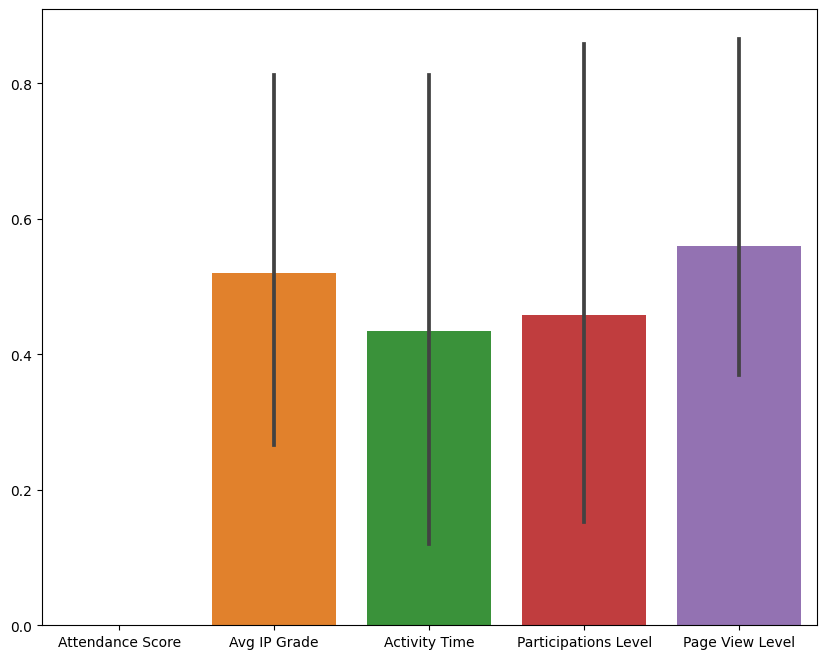

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

top_metrics = ang_corr.index[:2]

plt.figure(figsize=(10, 8))
sns.barplot(ang_corr)

In [199]:
df_angular.columns

Index(['Student ID', 'Attendance Score', 'Avg IP Grade', 'Activity Time',
       'Participations Level', 'Page View Level', 'Module', 'Next Module'],
      dtype='object')

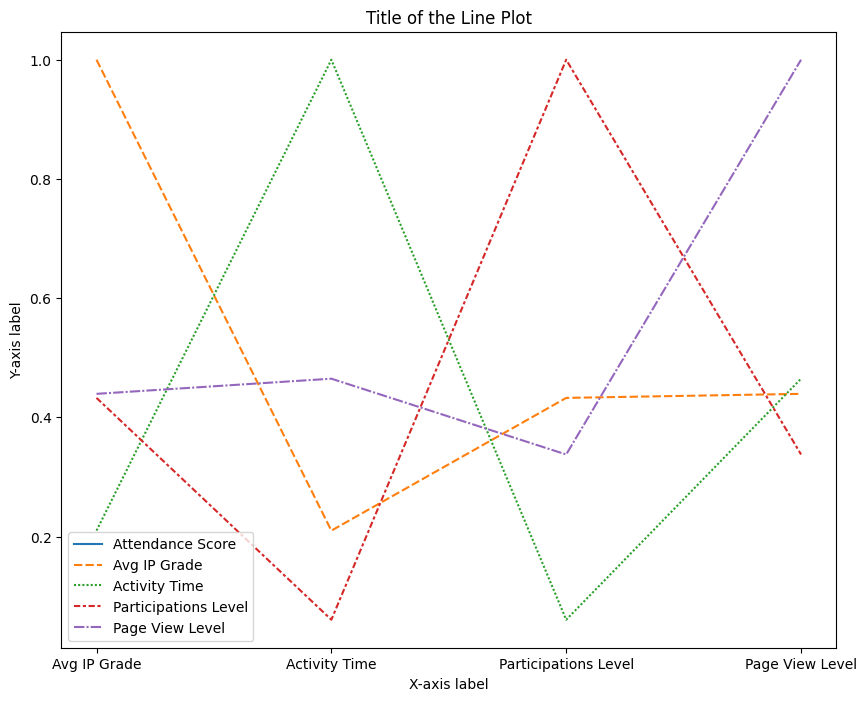

In [213]:
plt.figure(figsize=(10, 8))
sns.lineplot(data=ang_corr)
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Title of the Line Plot')
plt.show()


#### List of the most correlated to the module-to-module retention rate
1. Page View Level
2. Avg IP Grade
3. Participations Level
4. Activity Time 
5. Attendance Score



### If Moringa had to pick 2 metrics out of the above listed ones to help improve module-to-module retention, which should they pick and why?


From my findings the metrics with the strongest correlation are as follows Page View Level, Avg IP Grade, Participations Level, Activity Time and  Attendance Score in accending order. The 2 mertics that would help Moringa to improve module-to-mudule retention are Participation level and the Attendance Score with the content.

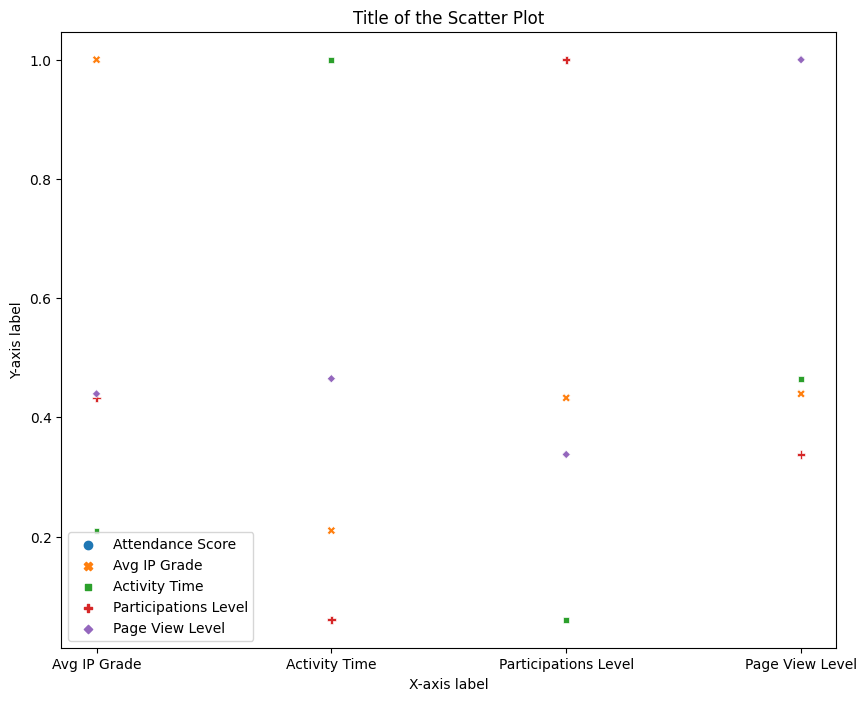

In [215]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=ang_corr)
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Title of the Scatter Plot')
plt.show()

<Axes: >

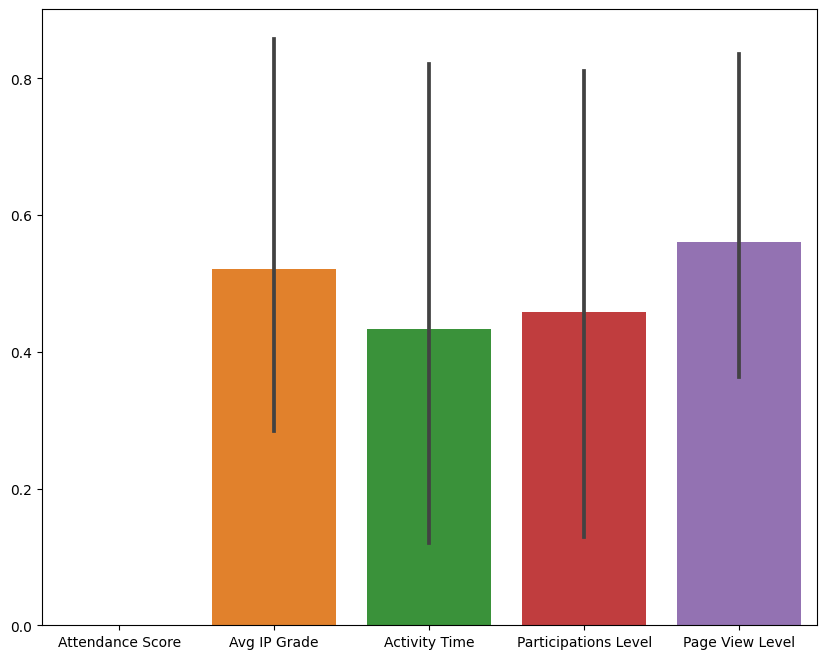

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

top_metrics = ang_corr.index[:2]

plt.figure(figsize=(10, 8))
sns.barplot(ang_corr)

<Figure size 1000x800 with 0 Axes>

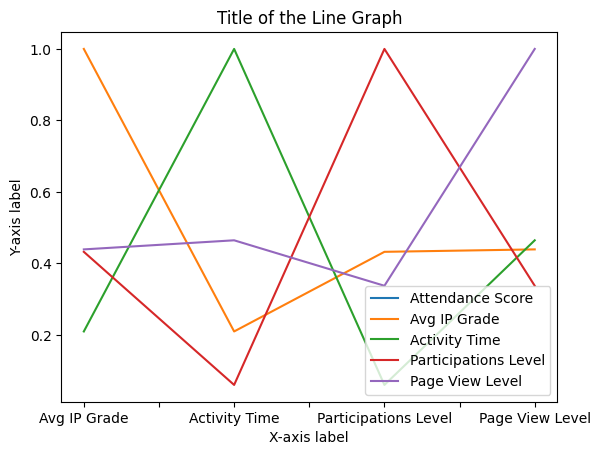

In [216]:
plt.figure(figsize=(10, 8))
ang_corr.plot(kind='line')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Title of the Line Graph')
plt.legend()
plt.show()



#### Recommendation

Better measuring technique on the Attendance score should be considered. 

Moringa should consider measuring the level of prior tech knowledge a student has. This is because it has an impact on the learning curve of a student. Students with prior knowledge usually don't struggle at the beginning and most students who are dropped out during the intro to Software Dev don't have prior tech knowledge 